# CleanTechTag 
## (Clean Technologies Tagging) - Data Analysis
---

### 1. Methods overlap and joined results

In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import matplotlib.pyplot as plt

In [2]:
data_d = pd.read_csv('../data/cleantechtag_deterministic_results.csv')
data_p = pd.read_csv('../data/cleantechtag_probabilistic_results.csv')
print('Deterministic: {}\nProbabilistic: {}'.format(len(data_d), len(data_p)))

Deterministic: 2323
Probabilistic: 8516


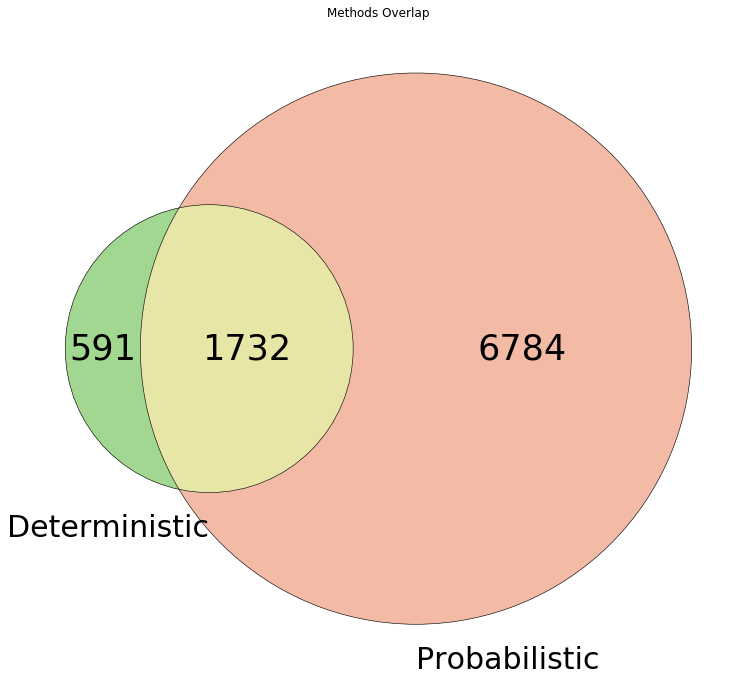

In [3]:
plt.figure(figsize=(16, 12))
v = venn2([set(data_d.id), 
       set(data_p.id)], 
      set_labels = ("Deterministic", 'Probabilistic'),
      set_colors=('#44b023', '#e8784f'), alpha=0.5)#
for text in v.set_labels:
    text.set_fontsize(30)
for text in v.subset_labels:
    text.set_fontsize(35)
c = venn2_circles([set(data_d.id), 
       set(data_p.id)], linestyle='solid', linewidth=0.6)
plt.title("Methods Overlap")
plt.savefig('../images/venn-methods.png')
plt.show()

In [4]:
data_inner = pd.merge(data_p,data_d,
    how='inner',on='id',suffixes=('_prob', '_det'))

In [5]:
print(len(data_inner))
print(len(list(set(list(data_d.id)) - set(list(data_p.id)))))
print(len(list(set(list(data_p.id)) - set(list(data_d.id)))))

1732
591
6784


---

### 2. Statistical selection for assessment

How does it look the ones that match on deterministic but not probabilistic?  
How does it look all the way around?

In [6]:
joint_results = data_inner[['id','category']]
joint_results.groupby('category').count()['id'].sort_values().head()#.plot()

category
AI manufacturing CAES                 1
geothermal energy geothermal          1
geothermal energy renewable energy    1
geothermal geothermal energy          1
geothermal power power-to-mobility    1
Name: id, dtype: int64

*To replicate the results use the copy made*

In [7]:
cordish2020 = pd.read_excel('../data/cordis-h2020projects.xlsx')

*To get the latest data go to the source endpoint*

In [8]:
#cordish2020 = pd.read_csv('https://cordis.europa.eu/data/cordis-h2020projects.csv', sep=';',error_bad_lines=False)

In [9]:
cordish2020['totalCost'] = [float(str(i).replace(',', '.')) for i in cordish2020['totalCost']]
cordish2020['ecMaxContribution'] = [float(str(i).replace(',', '.')) for i in cordish2020['ecMaxContribution']]
cordish2020['objective'] = [str(i) for i in cordish2020['objective']]
cordish2020['startDate'] = cordish2020['startDate'].map(pd.Timestamp)
cordish2020['endDate'] = cordish2020['endDate'].map(pd.Timestamp)

In [10]:
#Selecting all projects up to 2020 (starting date)
cordish2020 = cordish2020[cordish2020.startDate < pd.Timestamp(2021, 1, 1, 0)]

In [11]:
joint_results = cordish2020[cordish2020.id.isin(list(joint_results.id))]
joint_results.to_csv('../data/cleantechtag_joint_results.csv') #only once is need

In [12]:
joint_results.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
6,225983,875629,NAIMA,SIGNED,H2020-EU.2.1.3.;H2020-EU.2.1.2.,LC-BAT-2-2019,H2020,NA ION MATERIALS AS ESSENTIAL COMPONENTS TO MA...,2019-12-01,2022-11-30,...,The EU is transitioning to The EU is transitio...,7999897.03,7999897.03,H2020-LC-BAT-2019,RIA,TIAMAT,FR,BIOKOL SVERIGE AB;VLAAMSE INSTELLING VOOR TECH...,SE;BE;BG;ES;FR;NL;DE;SI,NaN
32,226246,870245,GEOCEP,SIGNED,H2020-EU.1.3.3.,MSCA-RISE-2019,H2020,Global Excellence in Modeling Climate and Ener...,2020-10-01,2024-09-30,...,The global GEOCEP project provides an innovati...,3036000.00,2254000.00,H2020-MSCA-RISE-2019,MSCA-RISE,UNIVERZITA KARLOVA,CZ,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,UK;CH;IT;FR,NaN
39,226082,887865,SAAT2020,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Scoring crops with Agricultural Artificial int...,2019-12-01,2020-05-31,...,"By 2050, our planet will be home to more than ...",71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,COMPUTOMICS GMBH,DE,NaN,NaN,NaN
40,226019,889249,BTSys,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Biosolids treatment system for transformation ...,2019-11-01,2020-02-29,...,Global annual organic waste generation is set ...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,AGRISTARBIO - ENVIRONMENTAL SOLUTIONS LDA,PT,NaN,NaN,NaN
53,225952,888396,Green-Insulation,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Green-Tech Fibre Insulation,2019-12-01,2020-05-31,...,Miljøskærm is a Danish SME having independentl...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,MILJOSKAERM APS,DK,NaN,NaN,NaN


In [13]:
#create a sample set on random choice to assess (only executed once)
#sample_list = list(np.random.choice(list(joint_results.id), 91, replace=False))
#cordish2020[cordish2020.id.isin(sample_list)][['title','objective','coordinator']].to_csv('../data/sample_to_tag.csv')

#### True positives rate after assessment

In [14]:
sample_lab = pd.read_csv('../data/sample_to_tag.csv')
print('True positives rate: {}'\
      .format(round(sample_lab.label.sum()*100/len(sample_lab),4)))

True positives rate: 93.4066


---

### 3. Demanded technologies

In [15]:
categories = pd.read_excel('../data/mitigation-technology-catalogue.xls')
categories = categories.fillna(method='ffill')
categories.columns = ['sector','technology_group','technology','description','technology_term','source','priority']
categories.head()

,sector,technology_group,technology,description,technology_term,source,priority
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,"photovoltaic, PV, “solar cell”",https://www.ctc-n.org/technologies/solar-pv,1
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,"“concentrated solar power”, CSP, “concentrated...",https://setis.ec.europa.eu/technologies/concen...,1
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,“solar heating”,https://www.ctc-n.org/technologies/solar-heating,1
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",“solar dryer”,https://www.ctc-n.org/technologies/solar-dryer,0
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,“solar water pump”,https://www.ctc-n.org/technologies/solar-water...,0


#### Percentage of priority technologies from catalogue

In [16]:
print('Priority technologies: {}%'\
      .format(round(100*categories.priority.sum()/len(categories.technology),4)))

Priority technologies: 78.7879%


---

### 4. Supplied technologies

In [17]:
# unnest the messy matches
list_technologies = data_inner['matches_technology']
technology_table = pd.DataFrame()
number_matches, cleaned_lists = [], []
for l in list_technologies:
    new_l = l.replace("[","").replace("]","").replace(" '","").replace("'","").replace("'","").split(',')
    cleaned_lists.append(new_l)
    number_matches.append(len(new_l))
technology_table['technology_terms'] = [y for x in cleaned_lists for y in x] 
print(len(number_matches) == len(data_inner.id))
#create a list with project id that equals the terms
ids = [[i]*j for i,j in zip(joint_results.id, number_matches)]   
technology_table['id'] =  [y for x in ids for y in x]

True


In [18]:
technology_table.head()

,technology_terms,id
0,renewable energy,875629
1,renewable energy,870245
2,biofuel,887865
3,waste management,889249
4,recycling,888396


In [19]:
matrix = []
for term in categories['technology_term']:
    row = [x.strip() for x in term.split(',')]
    row = [i.replace('“', '').replace('”', '') for i in row]
    matrix.append(row)

In [20]:
tech_dict = {key: value for (key, value) in zip(categories.technology, matrix)}

In [21]:
technology_table['category'] = None

for i in technology_table.index:
    for k,v in tech_dict.items():
        for j in v:
            if technology_table.loc[i,'technology_terms'] == j:
                technology_table.loc[i, 'category'] = k

In [22]:
technology_table.groupby('category').count()['id'].sort_values(ascending=False)

category
low GHG steel             443
solar PV                  333
recycling                 237
energy storage            217
waste management           89
                         ... 
manure management           1
direct seeding              1
downdraft                   1
improved durability         1
new sources of protein      1
Name: id, Length: 65, dtype: int64

---

### 5. Cost analysis (Calculating EU contribution)

In [23]:
#adding the EU contribution and the rest of features
cordish2020[['id','ecMaxContribution']].head() #'acronym','title','startDate','objective',

,id,ecMaxContribution
0,820323,997930.00
1,693229,3399248.88
2,801338,2946303.75
3,774477,17418339.00
4,801367,2726516.25


In [24]:
cost_per_category = pd\
    .merge(technology_table, cordish2020[['id','ecMaxContribution']],
             how='left', on='id')\
    .groupby('category')\
    .agg(['mean','sum'])['ecMaxContribution']\
    .sort_values(['sum','mean'], ascending=False)\
    .reset_index()\
    .merge(categories[['sector','technology','priority']], 
           how='left',left_on='category', right_on='technology')\
    [['sector','technology','priority','mean','sum']]

In [25]:
cost_per_category.head(10)

,sector,technology,priority,mean,sum
0,Industry,low GHG steel,1,2.517906e+06,1.115433e+09
1,Energy,solar PV,1,2.026759e+06,6.749108e+08
2,Human settlements,recycling,1,2.564712e+06,6.078368e+08
3,Energy,energy storage,1,2.434844e+06,5.283612e+08
4,Energy,geothermal,1,4.539148e+06,3.722101e+08
5,Transport,fuel cell,1,3.958473e+06,3.523041e+08
6,Energy,grid management,1,3.815960e+06,2.747492e+08
7,Energy,concentrated solar power (CSP),1,3.396851e+06,2.479701e+08
8,Industry,carbon capture and storage,1,3.083861e+06,2.312896e+08
9,Human settlements,district heating and/or cooling,1,4.470062e+06,1.966827e+08


In [26]:
def grouping(cost_per_category, category, agg):
    agg_df = cost_per_category.groupby(category).sum()[str(agg)].reset_index()
    agg_df['percentage'] = agg_df[str(agg)]*100/agg_df[str(agg)].sum()
    agg_df = agg_df.sort_values('percentage', ascending=False)
    return agg_df 

In [27]:
tech_sum = grouping(cost_per_category, ['priority','technology'], 'sum') 
sector_sum = grouping(cost_per_category, 'sector', 'sum') 
priority_sum = grouping(cost_per_category, 'priority', 'sum') 

In [28]:
tech_sum.head(10)

,priority,technology,sum,percentage
38,1,low GHG steel,1.115433e+09,16.301052
56,1,solar PV,6.749108e+08,9.863220
53,1,recycling,6.078368e+08,8.882992
23,1,energy storage,5.283612e+08,7.721527
28,1,geothermal,3.722101e+08,5.439519
26,1,fuel cell,3.523041e+08,5.148610
29,1,grid management,2.747492e+08,4.015214
19,1,concentrated solar power (CSP),2.479701e+08,3.623862
14,1,carbon capture and storage,2.312896e+08,3.380091
21,1,district heating and/or cooling,1.966827e+08,2.874343


In [29]:
sector_sum.head()

,sector,sum,percentage
2,Energy,2.726266e+09,39.841947
4,Industry,1.754551e+09,25.641200
3,Human settlements,1.114762e+09,16.291252
5,Transport,7.624924e+08,11.143146
1,Buildings,2.921601e+08,4.269659


In [30]:
priority_sum.head()

,priority,sum,percentage
1,1,6.721588e+09,98.230017
0,0,1.211147e+08,1.769983


In [31]:
categories.head()

,sector,technology_group,technology,description,technology_term,source,priority
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,"photovoltaic, PV, “solar cell”",https://www.ctc-n.org/technologies/solar-pv,1
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,"“concentrated solar power”, CSP, “concentrated...",https://setis.ec.europa.eu/technologies/concen...,1
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,“solar heating”,https://www.ctc-n.org/technologies/solar-heating,1
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",“solar dryer”,https://www.ctc-n.org/technologies/solar-dryer,0
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,“solar water pump”,https://www.ctc-n.org/technologies/solar-water...,0


In [32]:
#Unesting the catalogue subgroups 
def unest_catalogue(cat):
    cat['combined'] = cat['sector']+' '+cat['technology_group']
    to_change = cat[cat['combined'].isin(['Transport Fuel','Energy Storage','Energy System innovation','Transport System innovation'])].index
    new_tech_group = []
    for i in cat['technology_group'].index:
        if i in to_change:
            new_tech_group.append(cat.loc[i,'combined'])
        else:
            new_tech_group.append(cat.loc[i,'technology_group'])
    cat['technology_group'] = new_tech_group
    return cat

In [33]:
extensive_catalogue = unest_catalogue(pd.merge(technology_table, categories, how = 'left', left_on = 'category', right_on = 'technology'))
extensive_catalogue.to_csv('../data/extensive_catalogue.csv')

In [34]:
extensive_catalogue.sort_values(['sector','technology_group']).head(10)

,technology_terms,id,category,sector,technology_group,technology,description,technology_term,source,priority,combined
108,biochar,818308,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
222,biochar,748106,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
327,biochar,863000,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
328,alternative to meat,858543,new sources of protein,Agriculture,Cleaner product,new sources of protein,Technology of producing alternatives to meat a...,"“alternative to meat”, “alternatives to meat”,...",http://www.b-t.energy/landscape/agriculture/de...,1.0,Agriculture Cleaner product
681,biochar,836243,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
720,biochar,817214,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
1628,biochar,709606,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
1899,biochar,684143,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
2091,biochar,661323,biochar,Agriculture,Cleaner product,biochar,Technology of producing and using biochar – a ...,biochar,https://www.ctc-n.org/technologies/biochar,1.0,Agriculture Cleaner product
267,nutrient management,870518,nutrient management,Agriculture,Emissions and pollution reduction,nutrient management,Technology of integrating the use of natural a...,"“nutrient management”, “management of nutrient”",https://www.ctc-n.org/technologies/integrated-...,1.0,Agriculture Emissions and pollution reduction


In [35]:
extensive_catalogue.groupby('priority').count()['id']

priority
0.0      46
1.0    2427
Name: id, dtype: int64

In [36]:
#categories v1
1114/(1085+1114)

0.506593906321055

In [37]:
#categories v2
2150/(42+2150)

0.9808394160583942

In [38]:
#categories v3
2427/(46+2427)

0.9813991103922362

In [39]:
categories_raw_minus_categories_extended = \
    pd.merge(categories[['sector','technology_group','technology']],
             extensive_catalogue,
             how='left',on='technology')

In [40]:
len(categories_raw_minus_categories_extended)

2507

In [41]:
not_invested = categories_raw_minus_categories_extended[categories_raw_minus_categories_extended.id.isnull()]\
    [['sector_x','technology_group_x','technology']]\
    .reset_index(drop=True)\
    .rename(columns={'sector_x':'sector','technology_group_x':'technology_group'})\
    .merge(categories[['technology','priority']], how='left',on='technology')\
    .drop_duplicates()

In [42]:
not_invested.to_csv('../data/not_invested_technologies.csv',index=False)

In [43]:
not_invested.head()

,sector,technology_group,technology,priority
0,Energy,Solar energy sources,solar dryer,0
1,Energy,Solar energy sources,solar water pump,0
2,Energy,System innovation,low GHG transmission,1
11,Transport,Fuel,electric battery,1
12,Transport,Vehicle design,low GHG freight design,1


---

### 6. Priority vs non-Priority Summary
(parelell to tableau)

In [44]:
cordis_data = pd.merge(extensive_catalogue, joint_results, how='inner', on='id')

In [45]:
cordis_data.columns

Index(['technology_terms', 'id', 'category', 'sector', 'technology_group',
       'technology', 'description', 'technology_term', 'source', 'priority',
       'combined', 'rcn', 'acronym', 'status', 'programme', 'topics',
       'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl',
       'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme',
       'coordinator', 'coordinatorCountry', 'participants',
       'participantCountries', 'subjects'],
      dtype='object')

---
#### Number of projects using clean technology

In [46]:
len(cordis_data.id.unique())

1732

In [47]:
priority_table = cordis_data.groupby('id').mean()['priority'].reset_index()

In [48]:
priority_summary = priority_table.groupby('priority').count().reset_index()
priority_summary

,priority,id
0,0.000000,39
1,0.500000,5
2,0.666667,1
3,1.000000,1686


This is because you might have a project with more than one technology and those technologies might be priority or not, so we take all the 1 as priority 0 otherwise

In [49]:
priority = priority_summary.loc[3,'id']
total = len(cordis_data.id.unique())

print('Priority projects: {}, {}'.format(priority, priority/total*100))
print('Non-priority projects: {}, {}'.format(total-priority, (1-(priority/total))*100))

Priority projects: 1686, 97.34411085450347
Non-priority projects: 46, 2.655889145496537


In [50]:
priority_summary.id.sum()

1731

---
#### EU contribution for projects using clean technology

In [51]:
priority_conrtibution_summary = pd.merge(priority_table, cordis_data[['id','ecMaxContribution']], how='left', on='id')
priority_conrtibution_summary = priority_conrtibution_summary.groupby('priority').sum()['ecMaxContribution'].reset_index()
priority_conrtibution_summary

,priority,ecMaxContribution
0,0.000000,1.193102e+08
1,0.500000,3.508914e+06
2,0.666667,1.500000e+05
3,1.000000,6.719734e+09


This is because you might have a project with more than one technology and those technologies might be priority or not, so we take all the 1 as priority 0 otherwise

In [52]:
priorityM = priority_conrtibution_summary.loc[3,'ecMaxContribution']
totalM = cordis_data.ecMaxContribution.sum()

print('Priority contribution: {}, {}'.format(priorityM/1000000, round(priorityM/totalM*100,4)))
print('Non-priority contribution: {}, {}'.format((totalM-priorityM)/1000000, round((1-(priorityM/totalM))*100,4)))

Priority contribution: 6719.733593730023, 98.2005
Non-priority contribution: 123.13961693997669, 1.7995


In [53]:
print('Total EU spending in Million EUR: {}'.format(totalM))

Total EU spending in Million EUR: 6842873210.67
